In [ ]:
 pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.9 MB/s eta 0:00:00


In [ ]:
pip install qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit import QuantumCircuit, QuantumRegister, transpile, execute
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import partial_trace, entropy
import qiskit.quantum_info as qi

In [ ]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.4 MB/s eta 0:00:00


In [ ]:
simulator = Aer.get_backend('qasm_simulator')

In [ ]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

# Define the parameters
k=1
h=1.5

#Prepare the ground state
alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))

qc.ry(2*alpha,qr[0])
qc.cx(qr[0],qr[1])

qc.draw()

┌─────────────┐     
q1_0: ┤ Ry(-2.5536) ├──■──
      └─────────────┘┌─┴─┐
q1_1: ───────────────┤ X ├
                     └───┘
c0: 2/════════════════════

# Step 1: Alice's operation to inject energy into the system


In [ ]:
# Alice's projective measurement
qc.h(qr[0])
qc.measure(qr[0],cr[0])

qc.draw()

┌─────────────┐     ┌───┐┌─┐
q1_0: ┤ Ry(-2.5536) ├──■──┤ H ├┤M├
      └─────────────┘┌─┴─┐└───┘└╥┘
q1_1: ───────────────┤ X ├──────╫─
                     └───┘      ║ 
c0: 2/══════════════════════════╩═
                                0

# Step 2: Bob's conditional operations to get energy

In [ ]:
def sin(k,h):
    return (h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2)

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

# Define the parameters
k=1
h=1.5

#Prepare the ground state
alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))

qc.ry(2*alpha,qr[0])
qc.cx(qr[0],qr[1])

# Alice's projective measurement
qc.h(qr[0])
qc.measure(qr[0],cr[0])

#Bob's conditional operation
phi=0.5*np.arcsin(sin(k,h))
#qc.cry(-2*phi,qr[0],qr[1])
qc.ry(2*phi,qr[1]).c_if(cr[0], 0)
qc.ry(-2*phi,qr[1]).c_if(cr[0], 1)

qc.x(qr[0])
#qc.cry(2*phi,qr[0],qr[1])
qc.x(qr[0])


#Measurement of the interaction V
# Comment out qc.h(qr[1]) below for the measurement of Bob's Z term
qc.h(qr[1])
qc.measure(qr[1],cr[1])
#qc.measure(qr,cr)
qc.draw()

┌─────────────┐     ┌───┐┌─┐     ┌───┐          ┌───┐              
q2_0: ┤ Ry(-2.5536) ├──■──┤ H ├┤M├─────┤ X ├──────────┤ X ├──────────────
      └─────────────┘┌─┴─┐└───┘└╥┘┌────┴───┴────┐┌────┴───┴─────┐┌───┐┌─┐
q2_1: ───────────────┤ X ├──────╫─┤ Ry(0.33929) ├┤ Ry(-0.33929) ├┤ H ├┤M├
                     └───┘      ║ └──────╥──────┘└──────╥───────┘└───┘└╥┘
                                ║   ┌────╨─────┐   ┌────╨─────┐        ║ 
c1: 2/══════════════════════════╩═══╡ c1_0=0x0 ╞═══╡ c1_0=0x1 ╞════════╩═
                                0   └──────────┘   └──────────┘        1

In [ ]:
# qc_meas = QuantumCircuit(qr,cr)
# qc_meas.measure(qr,cr)

# qc_meas.draw()

In [ ]:
n_shots=100000

# qc_meas = QuantumCircuit(qr,cr)
# qc_meas.measure(qr,cr)
# #add main circuit to measurement circuit to have total circuit
# qc_total = qc.compose(qc_meas)

job = execute(qc, backend=simulator, shots=n_shots)
result = job.result()
counts = result.get_counts(qc)

# qc.draw()

Alice's local energy 1.2478354415067656 STD is 0.004743416429536836
Exact E_A 1.2480754415067656
Bob's local energy 1.2458254415067658 STD is 0.004743411153906016
Interacting energy V -0.4900796075495418 STD is 0.006324548205208019


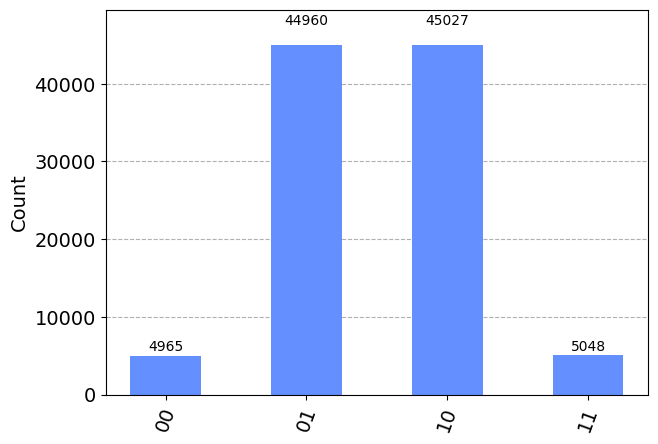

In [ ]:
ene_A=(h**2)/(np.sqrt(h**2+k**2))
#to compute the value of Bob's Z, comment out qc.h(qr[1]) in the circuit above and compute ene_B
ene_B=(h**2)/(np.sqrt(h**2+k**2))
ene_V=(2*k**2)/(np.sqrt(h**2+k**2))
error_A=[]
error_B=[]
error_V=[]
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]


        ene_A += h*(-1)**int(bit_string[0])*count/n_shots
        ene_B += h*(-1)**int(bit_string[1])*count/n_shots
        ene_V += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[1])*count/n_shots



        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            error_B.append(h*(-1)**int(bit_string[1]))
            error_V.append(2*k*(-1)**(int(bit_string[1])))



print("Alice's local energy",ene_A,"STD is",np.std(error_A)/np.sqrt(n_shots))
print("Exact E_A",(h**2)/(np.sqrt(h**2+k**2)))
print("Bob's local energy",ene_B,"STD is",np.std(error_B)/np.sqrt(n_shots))
print("Interacting energy V",ene_V,"STD is",np.std(error_V)/np.sqrt(n_shots))



plot_histogram(counts)

# QET on IBM Quantum Computers

In [ ]:
#import library for Quantum Computer (***had to add this***)
from qiskit import IBMQ

# Enable your account on Qiskit, replace 'My_API_Token' with your newly generated token
IBMQ.save_account('161094802406f955dcd2e076f7058ea7b3279816209f733b201252a26554e270268b2be6e5f7a590e82cdc363ed8f48dc33baf19702b8629c5c5bf1b22e1abe7')
IBMQ.load_account()
# After loading credentials we query the backends
# IBMQ.backends() (*** shows error, maybe obsolete)

<ipython-input-12-244ceca185a6>:5: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('161094802406f955dcd2e076f7058ea7b3279816209f733b201252a26554e270268b2be6e5f7a590e82cdc363ed8f48dc33baf19702b8629c5c5bf1b22e1abe7')
<ipython-input-12-244ceca185a6>:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('161094802406f955dcd2e076f7058ea7b3279816

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
# IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

In [ ]:
qd = provider.get_backend('ibmq_jakarta')

In [ ]:
from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= 0
                                   and not x.configuration().simulator)
backend=least_busy(small_devices)

print("Name", backend.name())
print("Status", backend.status())
print("Limit",backend.job_limit())
print("Remaining Jobs",backend.remaining_jobs_count())
print("Number of Active Jobs",backend.active_jobs())

Name ibm_nairobi
Status <qiskit.providers.models.backendstatus.BackendStatus object at 0x7c9b653645b0>
Limit <qiskit.providers.ibmq.backendjoblimit.BackendJobLimit object at 0x7c9b6540b6d0>
Remaining Jobs 3
Number of Active Jobs []


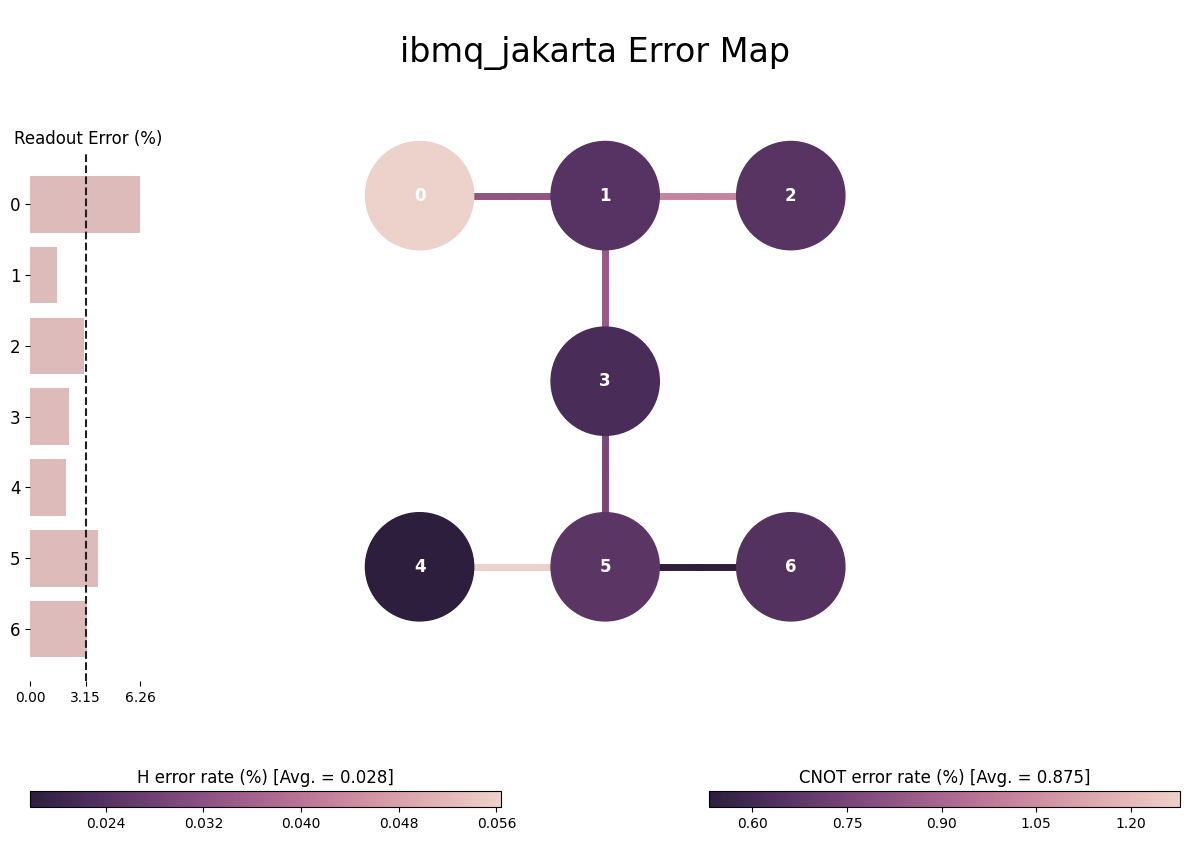

In [ ]:
from qiskit.visualization import plot_error_map
backend = qd
A=plot_error_map(backend)
A.tight_layout()
A.savefig(f'{backend}_error.png')
A

In [ ]:
props = backend.properties()

def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9
    GHz = 1e-9

    print("Qubit {0} has a \n"
          "  - T1 time of {1} microseconds\n"
          "  - T2 time of {2} microseconds\n"
          "  - U2 gate error of {3}\n"
          "  - U2 gate duration of {4} nanoseconds\n"
          "  - resonant frequency of {5} GHz".format(
              qubit,
              properties.t1(qubit) * us,
              properties.t2(qubit) * us,
              properties.gate_error('sx', qubit),
              properties.gate_length('sx', qubit) * ns,
              properties.frequency(qubit) * GHz))

describe_qubit(0, props)

Qubit 0 has a 
  - T1 time of 87.3500897234812 microseconds
  - T2 time of 31.813399231898337 microseconds
  - U2 gate error of 0.0002974551527261582
  - U2 gate duration of 35.55555555555556 nanoseconds
  - resonant frequency of 5.260500951093761 GHz


In [ ]:
print(backend.properties().gate_length('cx',[0,1])*1e9,"ns")

248.8888888888889 ns


# Start QET protocol on IBM Quantum Computers

In [ ]:
from qiskit.tools.monitor import job_monitor

Job Status: job has successfully run


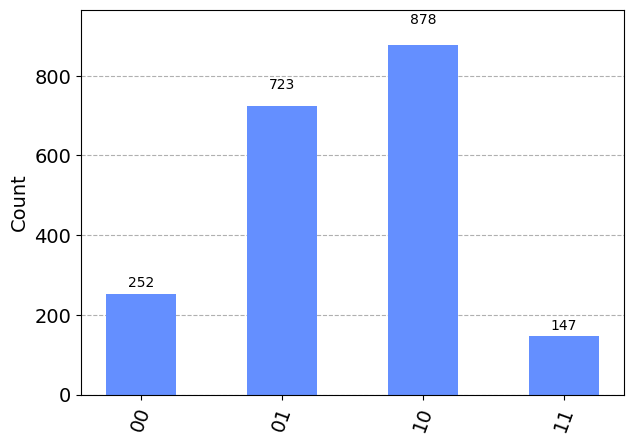

In [ ]:
n_shots=2000
qc_total = transpile(qc, backend=qd)

job = execute(qc_total, backend=qd, shots=n_shots)
job_monitor(job)
results = job.result()
counts = results.get_counts(qc_total)
plot_histogram([counts])

Alice's local energy 1.4430754415067657 STD is 0.03325639036335723
Exact E_A 1.2480754415067656
Interacting energy V -0.09259960754954169 STD is 0.04470738194079363


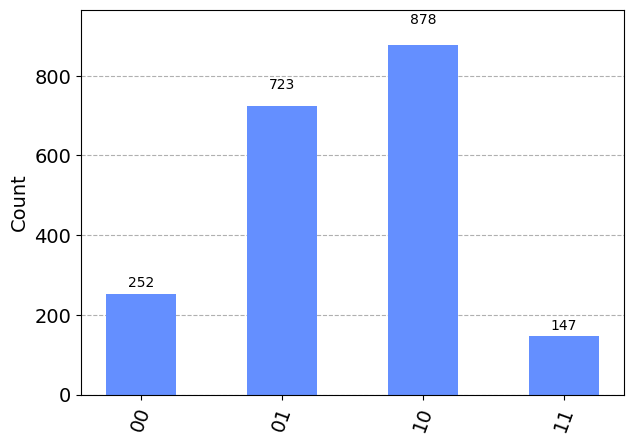

In [ ]:
ene_A=(h**2)/(np.sqrt(h**2+k**2))
#to compute the value of Bob's Z, comment out qc.h(qr[1]) in the circuit above and compute ene_B
# ene_B=(h**2)/(np.sqrt(h**2+k**2))
ene_V=(2*k**2)/(np.sqrt(h**2+k**2))
error_A=[]
error_B=[]
error_V=[]
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]


        ene_A += h*(-1)**int(bit_string[0])*count/n_shots
        # ene_B += h*(-1)**int(bit_string[1])*count/n_shots
        ene_V += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[1])*count/n_shots



        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            # error_B.append(h*(-1)**int(bit_string[1]))
            error_V.append(2*k*(-1)**(int(bit_string[1])))



print("Alice's local energy",ene_A,"STD is",np.std(error_A)/np.sqrt(n_shots))
print("Exact E_A",h**2/np.sqrt(h**2+k**2))
# print("Bob's local energy",ene_B,"STD is",np.std(error_B)/np.sqrt(n_shots))

print("Interacting energy V",ene_V,"STD is",np.std(error_V)/np.sqrt(n_shots))



plot_histogram(counts)